1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

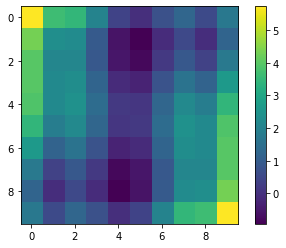

In [27]:
#Solution Q1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import interpolate
from scipy import optimize

def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

N = 10
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 1, N)
xv, yv = np.meshgrid(x, y)
v = f([xv,yv])

plt.imshow(v)
plt.colorbar()
plt.show()

2 -2
-1 1
Global min in: [ 0.08984202 -0.71265632]
Global min in: [-0.08984203  0.7126563 ]
Global min in (0,0):  [0. 0.]


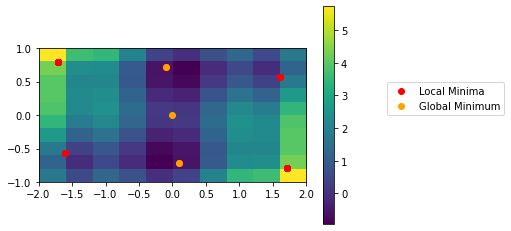

In [8]:
bounds = ((-2, 2), (-1,1))
print(bounds[0][1], bounds[0][0])
print(bounds[1][0],bounds[1][1])
xv = xv.flatten()
yv = yv.flatten()
local_minima = np.array([optimize.minimize(f, x0=[x,y], bounds = bounds) for (x,y) in zip(xv, yv)])
points_local_minima = np.array([el.x for el in local_minima]) 
func_local_minima = np.array([el.fun for el in local_minima]) 
xx = points_local_minima[:,0] 
yy = points_local_minima[:,1] 
global_min = func_local_minima.min()

x0 = [0, -1]
result0 = optimize.minimize(f, x0)

print('Global min in:', result0.x)

x1 = [0, 1]
result1 = optimize.minimize(f, x1)

print('Global min in:', result1.x)

x2 = [0, 0]
result2 = optimize.minimize(f, x2)

print('Global min in (0,0): ', result2.x)

xmin = np.array([result0.x[0], result1.x[0], result2.x[0]])
ymin = np.array([result0.x[1], result1.x[1], result2.x[1]])

N = 10
x = np.linspace(2, -2, num=N)
y = np.linspace(1, -1, num=N)
xv, yv = np.meshgrid(x, y)
v = f([xv,yv])

plt.imshow(v, extent=[-2, 2, -1, 1])
plt.colorbar()
plt.plot(xx, yy, linewidth=0, marker='o', color='r', label='Local Minima')
plt.plot(xmin, ymin, linewidth=0, marker='o',color='orange', label='Global Minimum')
plt.legend(loc=(1.3, 0.5))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 1  2  3  4  5  6  7  8  9 10 11 12]


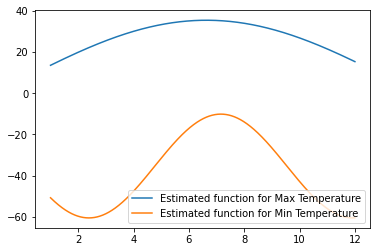

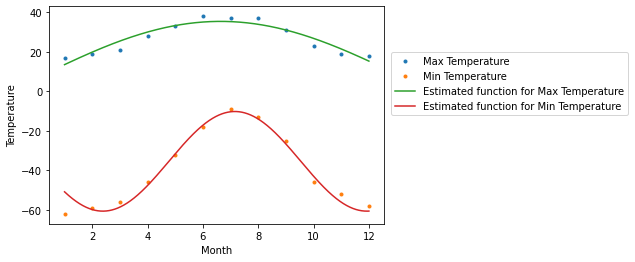

In [13]:
#Solution Q2

month = np.arange(1,13)
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

print(month)

def f(x, A, B, C):
    return C + A * np.sin(B * x)

max_params, max_params_covariance = optimize.curve_fit(f, month, max_temp, p0=[10, 1/2, np.mean(max_temp)])
min_params, min_params_covariance = optimize.curve_fit(f, month, min_temp, p0=[25, 1/2, np.mean(min_temp)])


lin = np.linspace(1,12, num=10000)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(lin, f(lin, max_params[0], max_params[1], max_params[2]), label = "Estimated function for Max Temperature")
ax.plot(lin, f(lin, min_params[0], min_params[1], min_params[2]), label = "Estimated function for Min Temperature")

ax.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(month, max_temp, '.', label = "Max Temperature")
ax.plot(month, min_temp, '.', label = "Min Temperature")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

max_params, max_params_covariance = optimize.curve_fit(f, month, max_temp, p0=[10, 1/2, np.mean(max_temp)])
min_params, min_params_covariance = optimize.curve_fit(f, month, min_temp, p0=[25, 1/2, np.mean(min_temp)])


lin = np.linspace(1,12, num=10000)
ax.plot(lin, f(lin, max_params[0], max_params[1], max_params[2]), label = "Estimated function for Max Temperature")
ax.plot(lin, f(lin, min_params[0], min_params[1], min_params[2]), label = "Estimated function for Min Temperature")

ax.legend(loc=(1.02, 0.5))

plt.show()


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

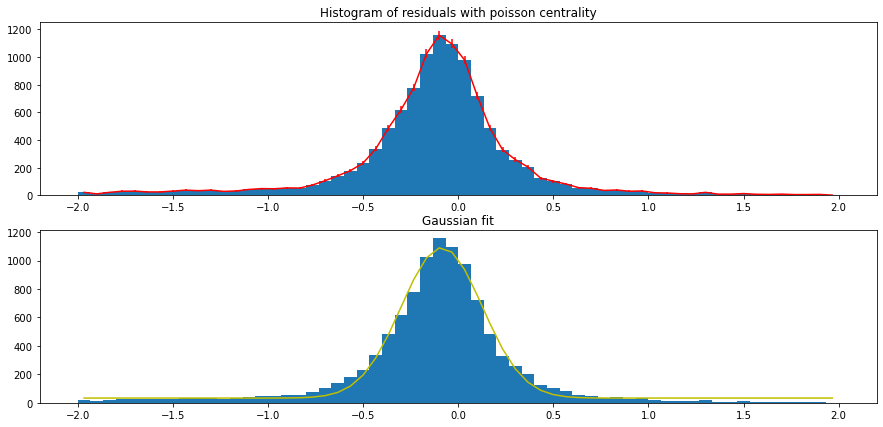

p value founded:  2.4856492036661198e-108
The p value is too small, so the fit is not satisfactory


In [24]:
#Solution Q3

import pickle
from scipy.optimize import curve_fit
from scipy import stats


def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data.item(0))
res = df['residuals'].to_numpy()

fig,(h1,h2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))
h,bins,_ = h1.hist(df['residuals'], bins = 60, range = (-2,2))
bin_centres = (bins[:-1] + bins[1:])/2.

sig_y = np.sqrt(np.abs(h))
h1.errorbar(x = bin_centres, y = h, yerr=sig_y, color="red")
h1.set_title("Histogram of residuals with poisson centrality")


parameters, covariance = curve_fit(gaussian, bin_centres, h)

gaussian_fit = gaussian(bin_centres, *parameters)

h2.plot(bin_centres, gaussian(bin_centres, *parameters), 'y-', label='gaussian fit')
h2.hist(df['residuals'], bins = 60, range = (-2,2))
h2.set_title("Gaussian fit")
plt.show()
statistic,p = stats.chisquare(h, gaussian_fit)
print("p value founded: ",p)
print("The p value is too small, so the fit is not satisfactory")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

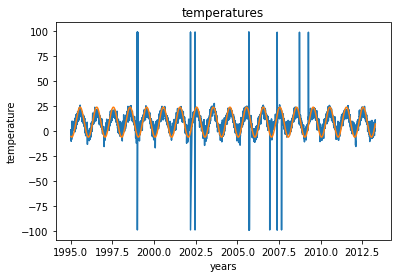

15 2.8 8.941907038598593
23.941394135329666
-6.058047035057573


In [26]:
#Solution Q4

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
 
x, y = np.loadtxt(open('munich_temperatures_average_with_bad_data.txt'), unpack = True)

a = 15
b = 2.8
c = np.mean(y)

p0 = [a,b,c]

def F(x, a, b, c):
    return a*np.cos(2*np.pi*x+b)+c
    
fit = curve_fit(F, x, y, p0=p0)
First_guess = F(x, *p0)

ymax = max(First_guess)
ymin = min(First_guess)



plt.plot(x, y)
plt.plot(x, First_guess)
plt.xlabel('years')
plt.ylabel('temperature')
plt.title('temperatures')
plt.show()
print (a, b, c)
print (ymax)
print(ymin)